## 이용실적이 좋은 스마트쉼터의 사례를 분석하기 위한 노트북
* data import
    * df : 스마트 쉼터 이용현황 데이터
    * df_ars : 스마트 쉼터 설치 버스정류장 ARS 데이터

In [2]:
import pandas as pd
df = pd.read_csv('data/서울특별시 성동구_스마트쉼터이용현황_20220804 (1).csv')
df_ars = pd.read_csv('data/서울특별시 성동구_스마트쉼터현황_20220609 (1).csv')

In [6]:
df_ars_drop1 = df_ars.drop(columns=['행정동'])
df_ars_drop1.head()

,설치일,버스정류소명,아이디,크기
0,2022-05-20,군자교남단,4216,소형
1,2022-05-20,금호역(금호터널입구방면),4155,소형
2,2022-05-20,금호역(마을버스종점),4764,소형
3,2020-07-31,금호역(현대아파트),4156,중형
4,2022-05-20,논골신협대림아파트후문,4560,소형


### new_df에 분석에 필요한 데이터를 묶을 예정

In [7]:
new_df = df.merge(df_ars_drop1, on = ['버스정류소명'], how = 'inner')
new_df['아이디'] = new_df['아이디'].astype(str).str.zfill(5)
new_df.head()

,지점코드,버스정류소명,00시,01시,02시,03시,04시,05시,06시,07시,...,17시,18시,19시,20시,21시,22시,23시,설치일,아이디,크기
0,S_0042_SJ00,군자교남단,0,0,0,0,27,51,95,164,...,199,165,147,95,58,37,25,2022-05-20,04216,소형
1,S_0040_HD02,논골신협대림아파트후문,0,0,0,0,5,39,91,167,...,262,271,166,109,99,59,40,2022-05-20,04560,소형
2,S_0037_SS12,뚝섬역 2번출구,0,0,0,0,12,16,34,40,...,165,146,127,99,79,77,51,2022-05-20,04237,소형
3,S_0019_SS23,뚝섬역3번5번출구(성수역),1,1,1,41,1437,302,962,2077,...,5527,6712,4713,3956,3833,3131,1541,2020-12-18,04238,중형
4,S_0038_SS12,뚝섬역 4번출구,1,0,0,0,17,21,18,104,...,487,510,346,178,167,160,82,2022-05-20,04239,소형


In [8]:
new_order = ['지점코드', '버스정류소명', '설치일', '아이디', '크기', '00시', '01시', '02시', '03시', '04시', '05시', '06시',
       '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시',
       '17시', '18시', '19시', '20시', '21시', '22시', '23시']
new_df = new_df[new_order]
new_df.head()

,지점코드,버스정류소명,설치일,아이디,크기,00시,01시,02시,03시,04시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,S_0042_SJ00,군자교남단,2022-05-20,04216,소형,0,0,0,0,27,...,195,210,203,199,165,147,95,58,37,25
1,S_0040_HD02,논골신협대림아파트후문,2022-05-20,04560,소형,0,0,0,0,5,...,379,316,385,262,271,166,109,99,59,40
2,S_0037_SS12,뚝섬역 2번출구,2022-05-20,04237,소형,0,0,0,0,12,...,161,144,137,165,146,127,99,79,77,51
3,S_0019_SS23,뚝섬역3번5번출구(성수역),2020-12-18,04238,중형,1,1,1,41,1437,...,5179,5867,5690,5527,6712,4713,3956,3833,3131,1541
4,S_0038_SS12,뚝섬역 4번출구,2022-05-20,04239,소형,1,0,0,0,17,...,346,413,434,487,510,346,178,167,160,82


In [9]:
# new_df.iloc[:,5:29] = new_df.iloc[:,5:29].astype(int)
new_df['일일 이용자수 합계(평균)'] = new_df.iloc[:,5:29].sum(axis=1)

### 버스 이용량 데이터

In [3]:
df_1 = pd.read_csv('data/버스이용량(202108~202207)/202108.csv', encoding='cp949')
df_2 = pd.read_csv('data/버스이용량(202108~202207)/202109.csv', encoding='cp949')
df_3 = pd.read_csv('data/버스이용량(202108~202207)/202110.csv', encoding='cp949')
df_4 = pd.read_csv('data/버스이용량(202108~202207)/202111.csv', encoding='cp949')
df_5 = pd.read_csv('data/버스이용량(202108~202207)/202112.csv', encoding='cp949')
df_6 = pd.read_csv('data/버스이용량(202108~202207)/202201.csv', encoding='cp949')
df_7 = pd.read_csv('data/버스이용량(202108~202207)/202202.csv', encoding='cp949')
df_8 = pd.read_csv('data/버스이용량(202108~202207)/202203.csv', encoding='cp949')
df_9 = pd.read_csv('data/버스이용량(202108~202207)/202204.csv', encoding='cp949')
df_10 = pd.read_csv('data/버스이용량(202108~202207)/202205.csv', encoding='cp949')
df_11 = pd.read_csv('data/버스이용량(202108~202207)/202206.csv', encoding='cp949')
df_12 = pd.read_csv('data/버스이용량(202108~202207)/202207.csv', encoding='cp949')

In [4]:
df_list=[df_1,df_2,df_3, df_4, df_5, df_6, df_7, df_8, df_9 , df_10, df_11, df_12]



In [10]:
bus_id = new_df['아이디'].tolist()
result_df = pd.DataFrame(columns=df_list[0].columns)
for i, df in enumerate(df_list, start=1) :
    filtered_df_i = df[df['버스정류장ARS번호'].isin(bus_id)]
    result_df = pd.concat([result_df, filtered_df_i]).reset_index(drop=True)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [13]:
result_df.to_csv('data/버스이용량전처리.csv', encoding= 'utf-8 sig', index = False)

In [101]:
result_df.drop(columns=['노선명', '노선번호', '역명', '등록일자', '표준버스정류장ID'], inplace=True)

In [103]:
agg_df = result_df.groupby('버스정류장ARS번호').agg({'승차총승객수': 'sum', '하차총승객수': 'sum'}).reset_index()

In [106]:
agg_df = agg_df.rename(columns={'버스정류장ARS번호' : '아이디'})


In [136]:
newer_df = new_df.merge(agg_df, on='아이디', how='inner')
newer_df.head()

,지점코드,버스정류소명,설치일,아이디,크기,00시,01시,02시,03시,04시,...,17시,18시,19시,20시,21시,22시,23시,일일 이용자수 합계(평균),승차총승객수,하차총승객수
0,S_0042_SJ00,군자교남단,2022-05-20,04216,소형,0,0,0,0,27,...,199,165,147,95,58,37,25,3122,75573,93671
1,S_0040_HD02,논골신협대림아파트후문,2022-05-20,04560,소형,0,0,0,0,5,...,262,271,166,109,99,59,40,4339,86350,127326
2,S_0037_SS12,뚝섬역 2번출구,2022-05-20,04237,소형,0,0,0,0,12,...,165,146,127,99,79,77,51,1809,128403,54475
3,S_0019_SS23,뚝섬역3번5번출구(성수역),2020-12-18,04238,중형,1,1,1,41,1437,...,5527,6712,4713,3956,3833,3131,1541,72837,139795,96655
4,S_0038_SS12,뚝섬역 4번출구,2022-05-20,04239,소형,1,0,0,0,17,...,487,510,346,178,167,160,82,4964,114677,123837


In [137]:
newer_df['승차총승객수 일일 평균'] = newer_df['승차총승객수'] / 365
newer_df['하차총승객수 일일 평균'] = newer_df['하차총승객수'] / 365

In [141]:
newer_df['버스승객수 일일 평균'] = (newer_df['승차총승객수'] + newer_df['하차총승객수']) / 365

In [143]:
newer_df['승객 1인 대비 쉼터 이용률'] = newer_df['일일 이용자수 합계(평균)'] / newer_df['버스승객수 일일 평균']

In [167]:
newer_df.to_csv('data/1차전처리합본.csv', encoding='utf-8 sig', index=False)
newer_df.columns

Index(['지점코드', '버스정류소명', '설치일', '아이디', '크기', '00시', '01시', '02시', '03시', '04시',
       '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시',
       '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시',
       '일일 이용자수 합계(평균)', '승차총승객수', '하차총승객수', '승차총승객수 일일 평균', '하차총승객수 일일 평균',
       '버스승객수 일일 평균', '승객 1인 대비 쉼터 이용률'],
      dtype='object')

In [1]:
import pandas as pd
newer_df = pd.read_csv('data/2차전처리합본.csv')

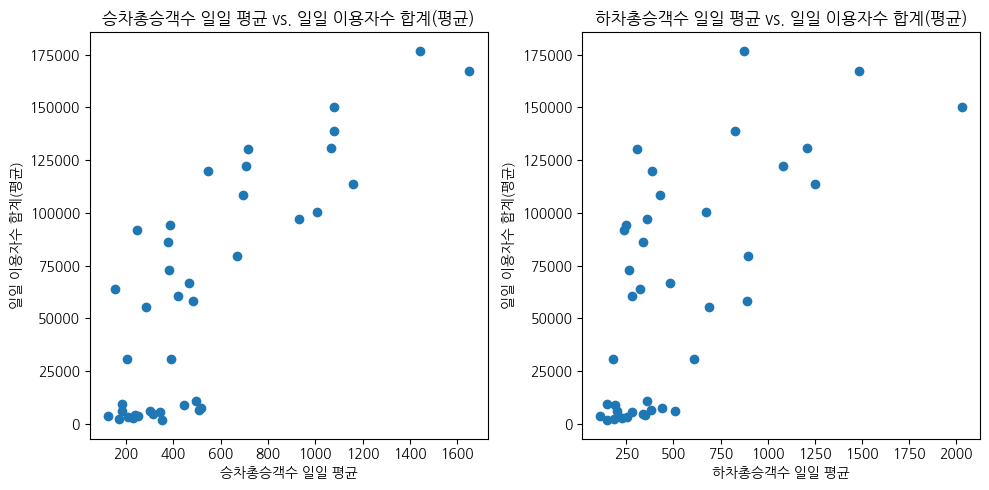

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#font 오류 수정

font_list = fm.findSystemFonts()
font_name = None
for font in font_list:
    if 'NanumGothic' in font:
        font_name = fm.FontProperties(fname=font).get_name()
plt.rc('font', family=font_name)

plt.figure(figsize=(10, 5))

# 승차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)
plt.subplot(1, 2, 1)
plt.scatter(newer_df['승차총승객수 일일 평균'], newer_df['일일 이용자수 합계(평균)'])
plt.title('승차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)')
plt.xlabel('승차총승객수 일일 평균')
plt.ylabel('일일 이용자수 합계(평균)')

# 하차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)
plt.subplot(1, 2, 2)
plt.scatter(newer_df['하차총승객수 일일 평균'], newer_df['일일 이용자수 합계(평균)'])
plt.title('하차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)')
plt.xlabel('하차총승객수 일일 평균')
plt.ylabel('일일 이용자수 합계(평균)')

plt.tight_layout()
plt.show()


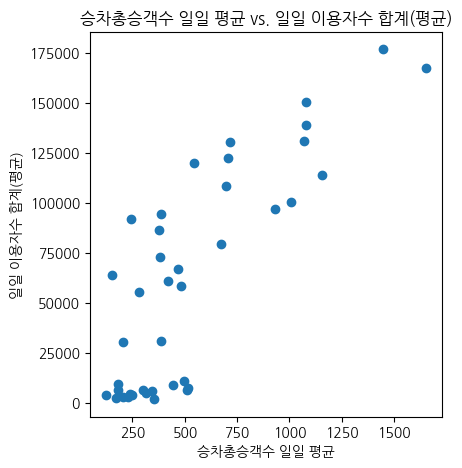

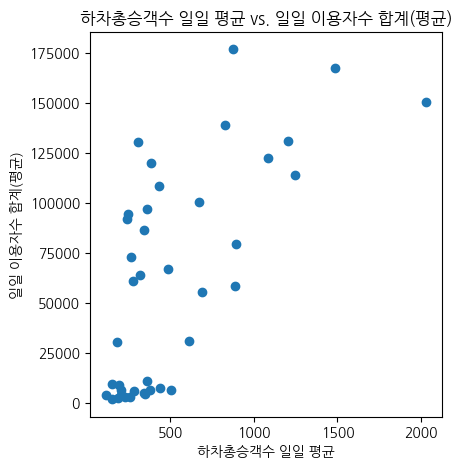

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# font 오류 수정

font_list = fm.findSystemFonts()
font_name = None
for font in font_list:
    if 'NanumGothic' in font:
        font_name = fm.FontProperties(fname=font).get_name()
plt.rc('font', family=font_name)

# 첫 번째 그래프: 승차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(newer_df['승차총승객수 일일 평균'], newer_df['일일 이용자수 합계(평균)'])
plt.title('승차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)')
plt.xlabel('승차총승객수 일일 평균')
plt.ylabel('일일 이용자수 합계(평균)')
plt.show()

# 두 번째 그래프: 하차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.scatter(newer_df['하차총승객수 일일 평균'], newer_df['일일 이용자수 합계(평균)'])
plt.title('하차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)')
plt.xlabel('하차총승객수 일일 평균')
plt.ylabel('일일 이용자수 합계(평균)')
plt.show()


* 승객 1인 대비 이용량이 가장 많은 쉼터 위치

In [157]:

newer_df['승객 1인 대비 쉼터 이용률'] = newer_df['승객 1인 대비 쉼터 이용률'].astype(float)

# '승객 1인 대비 쉼터 이용률' 열에서 값이 큰 10개의 행 가져오기
top_10_rows = newer_df.nlargest(10, '승객 1인 대비 쉼터 이용률')

# 결과 출력
top_10_rows['버스정류소명']

30                     응봉동주민센터(응봉사거리)
23               송정동건영아파트(송정동서울숲아이파크)
22                  성원중성수동이마트앞(성수공고앞)
10                   상왕십리역(왕십리2동주민센터)
29    용답동.로데오거리.답십리역(서울교통공사.서울새활용플라자)
24           신금호역(금호고등학교,금호자이1차아파트입구)
3                      뚝섬역3번5번출구(성수역)
14                    서울숲(성동구민종합체육센터)
15                      성동교남단(한양대정문앞)
33              송정동현대아이파크아파트(송정동자치회관)
Name: 버스정류소명, dtype: object

* 일일 이용자수가 가장 많은 쉼터 위치

In [158]:
top_use = newer_df.nlargest(10, '일일 이용자수 합계(평균)')
top_use['버스정류소명']

27               왕십리광장.왕십리역4번출구(무학여고)
8               무학여고(행당신동아.행당푸르지오아파트)
11                  상왕십리역(왕십리센트라스아파트)
7              마장축산물시장(동대문구청.용두역3번출구)
6                      마장축산물시장(도선사거리)
29    용답동.로데오거리.답십리역(서울교통공사.서울새활용플라자)
37                   한양대정문앞(서울숲삼부아파트)
10                   상왕십리역(왕십리2동주민센터)
31                       응봉사거리(무학여고앞)
14                    서울숲(성동구민종합체육센터)
Name: 버스정류소명, dtype: object

In [166]:
newer_df[newer_df['버스정류소명'] == '성동교남단(한양대정문앞)']

,지점코드,버스정류소명,설치일,아이디,크기,00시,01시,02시,03시,04시,...,21시,22시,23시,일일 이용자수 합계(평균),승차총승객수,하차총승객수,승차총승객수 일일 평균,하차총승객수 일일 평균,버스승객수 일일 평균,승객 1인 대비 쉼터 이용률
15,S_0022_SS12,성동교남단(한양대정문앞),2021-07-29,04185,중형,5,0,0,11,1070,...,3478,2404,772,60757,152532,101634,417.89589,278.449315,696.345205,87.251265


* 정류장 좌표랑 일반차로, 중앙차로 정보 추가하기

In [48]:
v1 = pd.read_csv('data/2차전처리합본.csv')
p1 = pd.read_csv('data/서울시버스노선기본정보(20230914).csv')
p1.head()

,노선번호,총 배차간격
0,17,12.285714
1,1,8.571429
2,411,14.571429
3,100,10.285714
4,101,11.142857


In [49]:
p2 = result_df.merge(p1, on='노선번호', how='inner')

In [57]:
p2.to_csv('data/배차간격합본.csv', encoding='utf-8 sig', index= False)

In [59]:
p2.head()
p2.drop(columns=['노선명', '노선번호', '역명', '등록일자', '표준버스정류장ID'], inplace=True)

In [61]:
p2.head
p2['총대기시간'] = p2['승차총승객수'] * p2['총 배차간격']

In [70]:
p2.head()
agg_df = p2.groupby('버스정류장ARS번호').agg({'총대기시간': 'sum'}).reset_index()
agg_df

,사용일자,버스정류장ARS번호,승차총승객수,하차총승객수,총 배차간격,총대기시간
0,20210801,04207,82,56,9.714286,796.571429
1,20210802,04207,265,257,9.714286,2574.285714
2,20210803,04207,248,228,9.714286,2409.142857
3,20210804,04207,298,267,9.714286,2894.857143
4,20210805,04207,269,264,9.714286,2613.142857


In [67]:
agg_df = agg_df.rename(columns={'버스정류장ARS번호' : '아이디'})
aagg_df  = v1.merge(agg_df, on = '아이디', how='inner')

ValueError: You are trying to merge on int64 and object columns for key '아이디'. If you wish to proceed you should use pd.concat